In [1]:

import numpy as np 
import pandas as pd 

import h5py as h5

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from keras.optimizers import Adam, RMSprop
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import os
train=h5.File('C:/Users/97254/Downloads/train_happy.h5', "r")
test=h5.File('C:/Users/97254/Downloads/test_happy.h5', "r")


In [2]:
train_x = np.array(train['train_set_x'][:])
train_y = np.array(train['train_set_y'][:])

test_x = np.array(test['test_set_x'][:])
test_y = np.array(test['test_set_y'][:])
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(600, 64, 64, 3)
(600,)
(150, 64, 64, 3)
(150,)


In [3]:
train_y = train_y.reshape((1, train_y.shape[0]))
test_y = test_y.reshape((1, test_y.shape[0]))

print(train_y.shape)
print(test_y.shape)

(1, 600)
(1, 150)


In [4]:
X_train = train_x / 255.0
X_test = test_x / 255.0

y_train = train_y.T
y_test = test_y.T
print(y_train.shape)
print(y_test.shape)

(600, 1)
(150, 1)


In [ ]:
An important benefit of the rectifier function is that it is capable of outputting a true zero value.

This is unlike the tanh and sigmoid activation functions that learn to approximate a zero output, e.g. a value very close to zero, but not a true zero value.

This means that negative inputs can output true zero values allowing the activation of hidden layers in neural networks to contain one or more true zero values. This is called a sparse representation and is a desirable property in representational learning as it can accelerate learning and simplify the model.

In [ ]:
The rectifier function is trivial to implement, requiring a max() function.



In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),

        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)
print("Number of weights after calling the model:", len(model.weights))

Number of weights after calling the model: 4


In [40]:
print(len(model.layers)) 

9


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1572992   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,573,121
Trainable params: 1,573,121
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
epochs = 30
batch_size = 30
history = model.fit(x=X_train, y=y_train, epochs=epochs, verbose=2,batch_size=batch_size)

Epoch 1/30
20/20 - 0s - loss: 0.8098 - accuracy: 0.6533
Epoch 2/30
20/20 - 0s - loss: 0.7299 - accuracy: 0.7000
Epoch 3/30
20/20 - 0s - loss: 0.6121 - accuracy: 0.7000
Epoch 4/30
20/20 - 0s - loss: 0.6685 - accuracy: 0.7050
Epoch 5/30
20/20 - 0s - loss: 0.5137 - accuracy: 0.7667
Epoch 6/30
20/20 - 0s - loss: 0.6481 - accuracy: 0.7000
Epoch 7/30
20/20 - 0s - loss: 0.5133 - accuracy: 0.7750
Epoch 8/30
20/20 - 0s - loss: 0.4984 - accuracy: 0.7617
Epoch 9/30
20/20 - 0s - loss: 0.5009 - accuracy: 0.7533
Epoch 10/30
20/20 - 0s - loss: 0.5131 - accuracy: 0.7767
Epoch 11/30
20/20 - 0s - loss: 0.4526 - accuracy: 0.8000
Epoch 12/30
20/20 - 0s - loss: 0.4304 - accuracy: 0.7950
Epoch 13/30
20/20 - 0s - loss: 0.4860 - accuracy: 0.7850
Epoch 14/30
20/20 - 0s - loss: 0.4967 - accuracy: 0.7817
Epoch 15/30
20/20 - 0s - loss: 0.3782 - accuracy: 0.8300
Epoch 16/30
20/20 - 0s - loss: 0.3642 - accuracy: 0.8533
Epoch 17/30
20/20 - 0s - loss: 0.4293 - accuracy: 0.8167
Epoch 18/30
20/20 - 0s - loss: 0.3089 - 

In [26]:
test_score = model.evaluate(X_test, y_test, verbose=1)

5/5 [==============================] - 0s 51ms/step - loss: 0.2031 - accuracy: 0.9200


In [27]:
print('test loss:', test_score[0])
print('test accuracy:', test_score[1])

test loss: 0.20313744246959686
test accuracy: 0.9200000166893005


In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


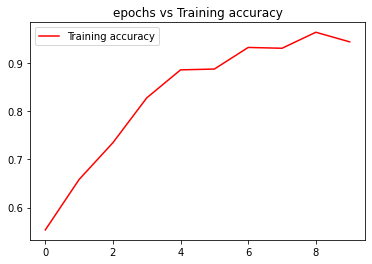

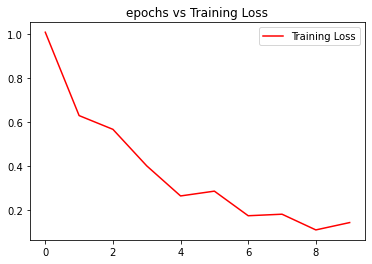

In [21]:
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']

E = range(len(training_accuracy))
plt.plot(E, training_accuracy, color='red', label='Training accuracy')
plt.title('epochs vs Training accuracy')
plt.legend()

plt.figure()
plt.plot(E, training_loss, color='red', label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()